In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import yfinance as yf

import sys
sys.path.append("..")
from utils import *

from volatility_modelling.model import ARMA_GARCH
plt.style.use('ggplot')

## Data loading

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6968.579, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7055.803, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7024.815, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7003.056, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7054.161, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=6970.772, Time=0.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6966.794, Time=0.46 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6984.118, Time=0.46 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=6967.503, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=6967.493, Time=1.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=6966.505, Time=0.31 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=6968.403, Time=0.36 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=6969.353, Time=1.85 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=6964.869, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0]          

,Kilopris (kr),Vekt (tonn),GARCH,Year,Week,Month,Day of year
uke,,,,,,,
2000-01-10,31.12,4054,2.104836,2000,2,1,10
2000-01-17,31.03,4043,2.087531,2000,3,1,17
2000-01-24,30.95,3730,2.069710,2000,4,1,24
2000-01-31,31.30,3831,2.052053,2000,5,1,31
2000-02-07,32.53,4415,2.041525,2000,6,2,38
...,...,...,...,...,...,...,...
2023-07-31,83.28,20469,5.449475,2023,31,7,212
2023-08-07,80.26,21060,5.413222,2023,32,8,219
2023-08-14,78.14,22698,5.382258,2023,33,8,226


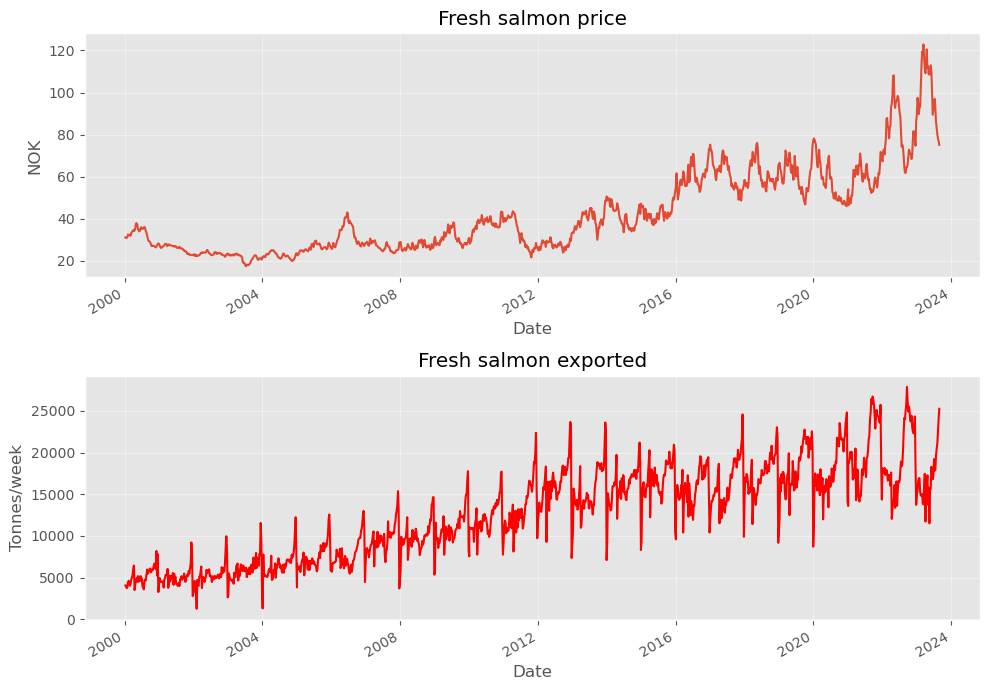

In [2]:
data_URL = 'https://www.ssb.no/statbank/sq/10086365'

data = import_salmon_data(data_URL)

GARCH_model = ARMA_GARCH(data['Kilopris (kr)'])

data = data[1:]

data['GARCH'] = GARCH_model.conditional_volatility.values

add_lags(data)

display(data)

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 7))

data['Kilopris (kr)'].plot(ax=ax1, ylabel='NOK')
data['Vekt (tonn)'].plot(ax=ax2, color='red', ylabel='Tonnes/week')
ax1.set_title('Fresh salmon price')
ax2.set_title('Fresh salmon exported')
ax1.grid(alpha=0.4); ax2.grid(alpha=0.4)
ax1.set_xlabel('Date'); ax2.set_xlabel('Date')
fig.tight_layout()

## Data analysis

,Kilopris (kr),Vekt (tonn),GARCH,Year,Week,Month,Day of year
uke,,,,,,,
2000-01-10,31.12,4054,2.104836,2000,2,1,10
2000-01-17,31.03,4043,2.087531,2000,3,1,17
2000-01-24,30.95,3730,2.069710,2000,4,1,24
2000-01-31,31.30,3831,2.052053,2000,5,1,31
2000-02-07,32.53,4415,2.041525,2000,6,2,38
...,...,...,...,...,...,...,...
2023-07-31,83.28,20469,5.449475,2023,31,7,212
2023-08-07,80.26,21060,5.413222,2023,32,8,219
2023-08-14,78.14,22698,5.382258,2023,33,8,226


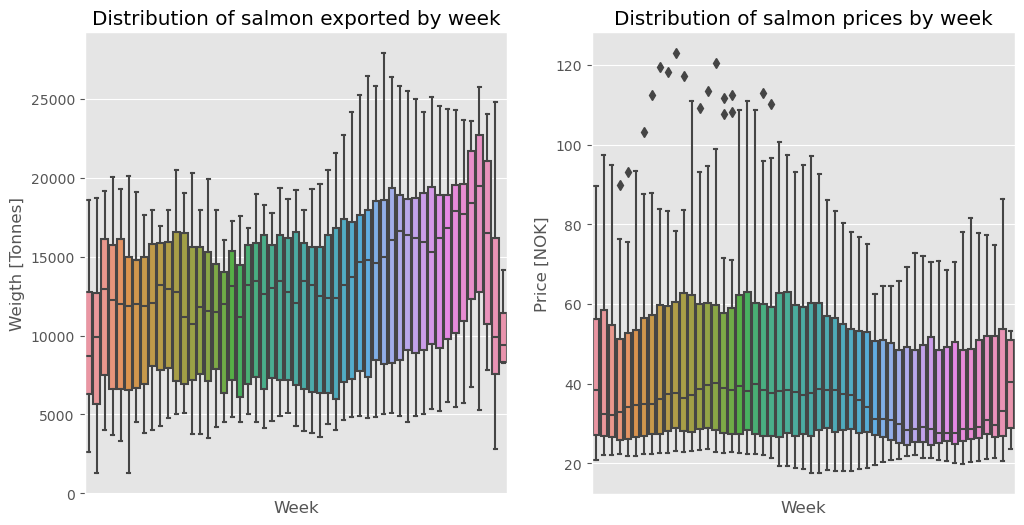

In [3]:
display(data)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=data, x='Week', y='Vekt (tonn)', ax=ax1)
sns.boxplot(data=data, x='Week', y='Kilopris (kr)', ax=ax2)
ax1.set_title('Distribution of salmon exported by week')
ax2.set_title('Distribution of salmon prices by week')
ax1.set_xticks([])
ax2.set_xticks([])
ax1.set_ylabel('Weigth [Tonnes]')
ax2.set_ylabel('Price [NOK]')

fig.savefig('boxplot.png')

## Model training

In [20]:

display(data)

features = ['Year', 'Week', 'Month', 'Day of year', 'GARCH']
targets = ['Vekt (tonn)', 'Kilopris (kr)']

model_list = list()

for i in range(50):
    model = xgb_model(data, targets, features)
    model_list.append(model)


,Kilopris (kr),Vekt (tonn),GARCH,Year,Week,Month,Day of year
uke,,,,,,,
2000-01-10,31.12,4054,2.104836,2000,2,1,10
2000-01-17,31.03,4043,2.087531,2000,3,1,17
2000-01-24,30.95,3730,2.069710,2000,4,1,24
2000-01-31,31.30,3831,2.052053,2000,5,1,31
2000-02-07,32.53,4415,2.041525,2000,6,2,38
...,...,...,...,...,...,...,...
2023-07-31,83.28,20469,5.449475,2023,31,7,212
2023-08-07,80.26,21060,5.413222,2023,32,8,219
2023-08-14,78.14,22698,5.382258,2023,33,8,226


## Model prediction

,Importance
Year,0.715842
Week,0.117882
Month,0.095505
Day of year,0.047432
GARCH,0.023339


,Year,Week,Month,Day of year,GARCH
Date,,,,,
2023-09-03,2023,35,9,246,5.238074
2023-09-10,2023,36,9,253,5.240264
2023-09-17,2023,37,9,260,5.242454
2023-09-24,2023,38,9,267,5.244642
2023-10-01,2023,39,10,274,5.246829
...,...,...,...,...,...
2027-05-30,2027,21,5,150,5.649118
2027-06-06,2027,22,6,157,5.651149
2027-06-13,2027,23,6,164,5.653179


Text(0.5, 1.0, 'ARIMA(1,1)-GARCH(1,1) forecast')

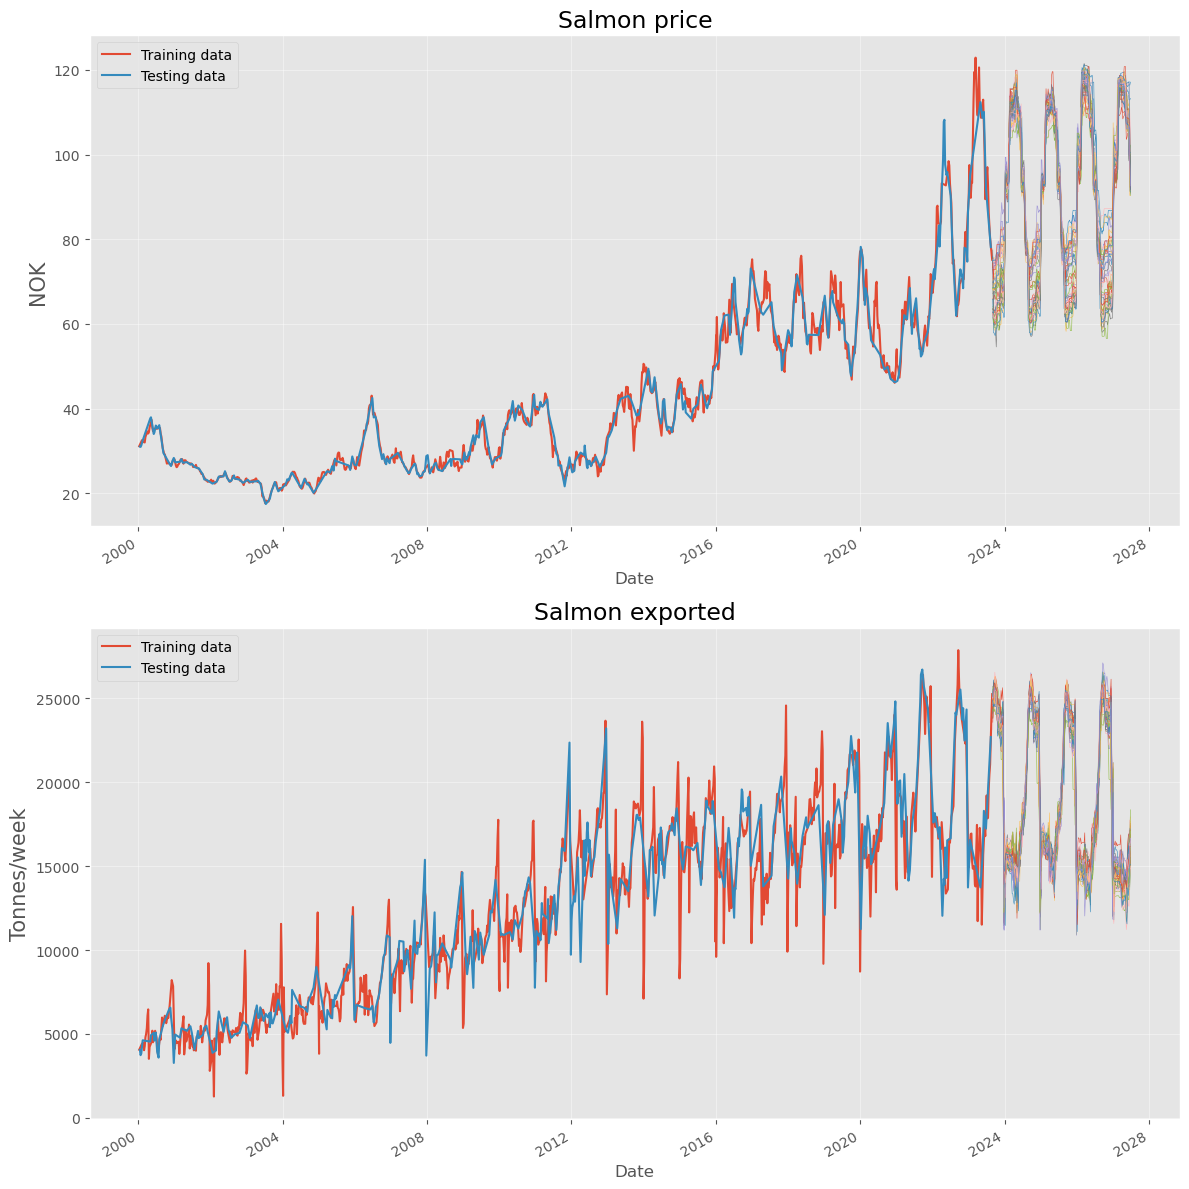

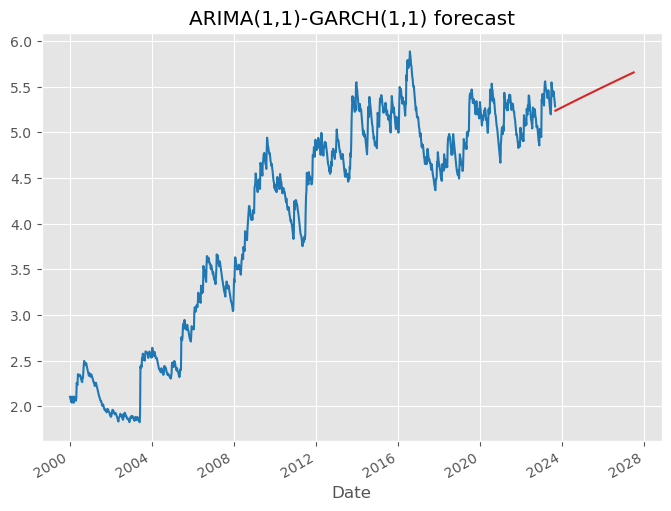

In [23]:
first_model = model_list[0]

fi = pd.DataFrame(
    data=first_model.reg_model.feature_importances_, 
    index=first_model.reg_model.feature_names_in_, 
    columns=['Importance'])
display(fi)

future_dates = pd.DataFrame(
    pd.date_range(
        start=data.index.values[-1], 
        end='2030-09-07'
    ), columns=['Date']
)

lags = 200

future_dates = future_dates.set_index(future_dates['Date']).resample('W').first()[:lags]
add_lags(future_dates)

future_dates = future_dates.drop('Date', axis=1)

GARCH_forecast = GARCH_model.forecast(len(future_dates)).variance.T

future_dates['GARCH'] = np.sqrt(GARCH_forecast.values)

display(future_dates)

prediction_list = list()

for i, model in enumerate(model_list):
    predictions = pd.DataFrame(
        model.reg_model.predict(future_dates), 
        columns=targets, 
        index=future_dates.index
    )
    prediction_list.append(predictions)

fig, axs = plt.subplots(2, figsize=(12, 12))

data_types = ['Training data', 'Testing data', 'Prediction']
label = ['NOK', 'Tonnes/week']
title = ['Salmon price', 'Salmon exported']

for i, target in enumerate(['Kilopris (kr)', 'Vekt (tonn)']):
    for j, df in enumerate([first_model.y_train, first_model.y_test]):
        df[target].plot(ax=axs[i], label=data_types[j])
        axs[i].legend(fontsize=12, frameon=False)
        axs[i].grid(alpha=0.4)
        axs[i].set_ylabel(label[i], fontsize=15)
        axs[i].set_title(title[i], fontsize=17)

    for k, df in enumerate(prediction_list):
        df[target].plot(ax=axs[i], linewidth=0.4)

fig.tight_layout()

fig, ax = plt.subplots(figsize=(8, 6))

data['GARCH'].plot(ax=ax, color='tab:blue')
future_dates['GARCH'].plot(ax=ax, color='tab:red')
ax.set_title('ARIMA(1,1)-GARCH(1,1) forecast')

C:\Users\joneh\AppData\Local\Temp\ipykernel_15288\271408185.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  october.set_index(october.index.week, inplace=True)


,Kilopris (kr)
Date,
39,73.735535
40,74.812035
41,74.812035
42,76.850540
43,76.850540


Text(0, 0.5, 'Price [NOK]')

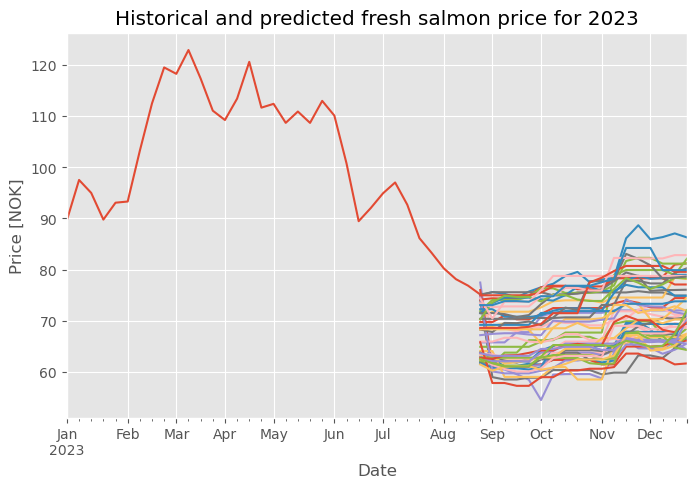

In [22]:
october = predictions[['Kilopris (kr)']].loc[(predictions.index.year == 2023) & (predictions.index.month == 10)]

october.set_index(october.index.week, inplace=True)

display(october)

fig, ax = plt.subplots(figsize=(8, 5))

data['Kilopris (kr)'].loc[data.index.year == 2023].plot(ax=ax)
for prediction in prediction_list:
    prediction['Kilopris (kr)'].loc[prediction.index.year == 2023].plot(ax=ax)

ax.set_title('Historical and predicted fresh salmon price for 2023')
ax.set_ylabel('Price [NOK]')